# Chapter 3: Advanced Image Pre-processing operations

## Introduction

In the world of image processing, capturing the details and nuances of an image is vital. Often, due to lighting conditions or limitations of camera sensors, images might not depict their subjects with optimum contrast, leading to a loss in detail. Machine learning models, especially those based on neural networks, are notoriously sensitive to the scale and distribution of input data. When we deal with images, the varied ranges and scales of pixel values can sometimes be a hindrance to the model's learning process. 

In this chapter, we'll delve into fundamental image processing techniques that help in preparing image data for machine learning tasks.  These techniques help increase the variability and diversity of the training data, leading to better model generalization and performance.

**Learning Objectives**

- **Histogram equalization:** To improve the contrast of an image by redistributing pixel intensities. 


- **Image Normalization and Standardization:** which can be employed to accelerate the convergence speed of gradient-based optimization algorithms


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


## Histogram Equalization


* What is a Histogram in Imaging Context?

It is a technique to improve the contrast of an image by redistributing pixel intensities.
A histogram is used here to represent the distribution of pixel intensities (from dark to bright) in an image. Essentially, it gives us an overview of the image’s contrast and brightness distribution.

* The Premise of Histogram Equalization:

Histogram equalization aims to optimize the contrast of an image by redistributing pixel intensities. The process makes the darker regions darker and the brighter regions brighter, which can significantly improve the visibility of features in an image.

#### Some of the benefits of Histogram Equalization:


* Adaptive to Image Content: The method doesn't require manual thresholding or tuning, as it inherently adjusts to the image's content.

* Improving Visibility: Particularly useful for images with background and foreground illumination disparity.


**Using OpenCV**

OpenCV provides a direct method for histogram equalization.

In [42]:
image_path_13 ='data/woman_staring.jpg'
image_cv = cv2.imread(image_path_13)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
gray_image_cv = cv2.cvtColor(image_cv_rgb, cv2.COLOR_RGB2GRAY)

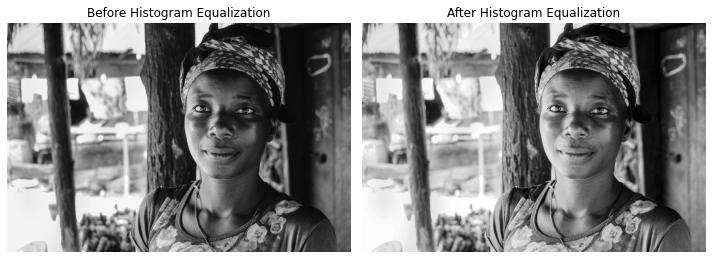

In [48]:
# Apply histogram equalization to the grayscale image
equalized_image_cv = cv2.equalizeHist(gray_image_cv)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image_cv, cmap='gray')
plt.title("Before Histogram Equalization")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_cv, cmap='gray')
plt.title("After Histogram Equalization")
plt.axis('off')

plt.tight_layout()
plt.show()


**Using TensorFlow:**

Histogram equalization in TensorFlow involves the following steps:

1. Compute the histogram of the image.
2. Compute the cumulative distribution function (CDF) of the histogram.
3. Use the CDF to map the original pixel values to the equalized values.


In [44]:
import tensorflow as tf

def histogram_equalization(image):
    """
    Perform histogram equalization on a given image using TensorFlow.

    Parameters:
    - image: A grayscale image tensor of shape (height, width) with values in [0, 255].

    Returns:
    - Equalized image tensor of the same shape as the input.
    """
    
    # Step 1: Compute the histogram
    #histogram = tf.histogram_fixed_width(image, [0, 255], nbins=256)
    image_tf_32 = tf.cast(image, dtype=tf.float32)
    histogram = tf.histogram_fixed_width(image_tf_32, [0, 255], nbins=256)
    # Step 2: Compute the normalized cumulative distribution function (CDF)
    cdf = tf.cumsum(histogram)
    cdf_min = tf.reduce_min(cdf)
    cdf_normalized = 255 * (cdf - cdf_min) / (tf.reduce_max(cdf) - cdf_min)
    cdf_normalized = tf.cast(cdf_normalized, tf.int64)
    
    # Step 3: Use the CDF to equalize the image
    equalized_image = tf.gather(cdf_normalized, tf.cast(image, tf.int64))
    
    return equalized_image

In [45]:
# Example usage:
image_path_14 ='data/young_pupils.jpg'
image_= tf.io.read_file(image_path_14)
image_tf = tf.image.decode_jpeg(image_)
grayscale_image_tf = tf.image.rgb_to_grayscale(image_tf)
equalized_image_tf = histogram_equalization(grayscale_image_tf)

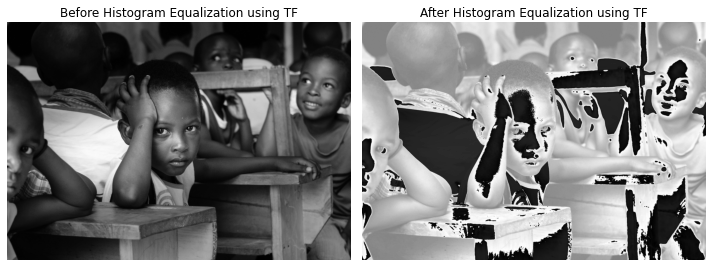

In [46]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image_tf, cmap='gray')
plt.title("Before Histogram Equalization using TF")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_tf, cmap='gray')
plt.title("After Histogram Equalization using TF")
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram equalization is a powerful tool for improving the visual quality of images, especially when they suffer from poor contrast. Using TensorFlow, we can efficiently compute and apply histogram equalization to images, making it a handy preprocessing step in many computer vision and deep learning applications. If you're working with color images, remember to convert them to grayscale or apply histogram equalization to each channel separately.

## Image Normalization and Standardization

Context: Preparing Data for ML Models

* **The Distinction: Normalization vs. Standardization:**

**Normalization:** Typically refers to the scaling of pixel values to the range [0,1]. It helps in bringing the entire dataset to a common scale without losing out on the features of the pattern.

**Standardization (or Z-Score Normalization):** Refers to the process of scaling the data so that it has a mean $(\mu)$ of 0 and a standard deviation $(\sigma)$ of 1. This makes the model less sensitive to variations in the pixel values.

* **Why Are These Transformations Vital?**


**Convergence Speed:** Normalizing or standardizing the input can accelerate the convergence speed of gradient-based optimization algorithms.


**Model Performance:** Neural networks, in particular, are sensitive to the input scale, making normalization and standardization crucial for optimal performance.



In [ ]:
image_path_3 ='data/boy_showing_hands.jpg'
image_cv = cv2.imread(image_path_3)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

image_path_4 ='data/children_at_school.jpg'
image_= tf.io.read_file(image_path_4)
image_tf = tf.image.decode_jpeg(image_)

**Using OpenCV**

###  Normalization

In [50]:
image_path_15 ='data/woman_dancing.jpg'
image_cv = cv2.imread(image_path_15)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [51]:
import cv2
import numpy as np


# Normalize to [0, 1]
normalized_image1_cv = cv2.normalize(image_cv_rgb, None, alpha=0, beta=1, 
                                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Normalize to [-1, 1]
normalized_image2_cv  = cv2.normalize(image_cv_rgb, None, alpha=-1, beta=1,
                                      norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


In [52]:
normalized_image_cv = cv2.normalize(image_cv_rgb, None, 0, 1)#@, cv2.NORM_MINMAX)
print(normalized_image_cv.shape)

(6168, 4114, 3)


In [53]:
print('on initial image')
print("min_pixel = " , image_cv_rgb.min()  , "and max_pixel = ", image_cv_rgb.max())

on initial image
min_pixel =  0 and max_pixel =  255


In [54]:
print('on normalized image 1')
print("min_pixel = " , normalized_image1_cv.min()  , "and max_pixel = ", normalized_image1_cv.max())

print("=============")

print('on normalized image 2')
print("min_pixel = " , normalized_image2_cv.min()  , "and max_pixel = ", normalized_image2_cv.max())

on normalized image 1
min_pixel =  0.0 and max_pixel =  1.0
on normalized image 2
min_pixel =  -1.0 and max_pixel =  1.0000001


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


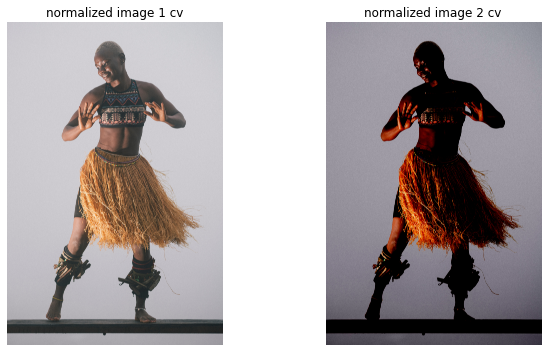

In [55]:
# Apply histogram equalization to the grayscale image
#equalized_image_cv = cv2.equalizeHist(gray_image_cv)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalized_image1_cv)#, cmap='gray')
plt.title("normalized image 1 cv")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image2_cv)#, cmap='gray')
plt.title("normalized image 2 cv")
plt.axis('off')

plt.tight_layout()
plt.show()


### Standardization

In [56]:
image_path_15 ='data/woman_dancing.jpg'
image_cv = cv2.imread(image_path_15)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [57]:
# Assuming the image is already loaded as 'image'
mean = np.mean(image_cv_rgb)
std = np.std(image_cv_rgb)
standardized_image_cv = (image_cv_rgb - mean) / (std  + 1e-7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


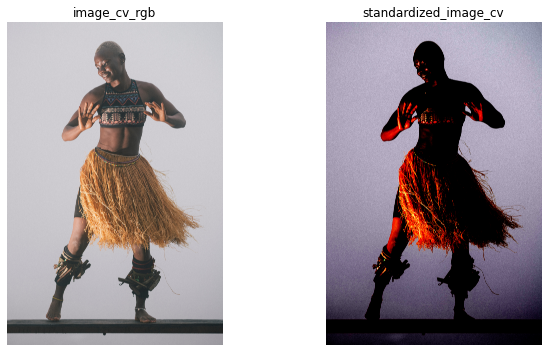

In [58]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_cv_rgb)#, cmap='gray')
plt.title("image_cv_rgb")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(standardized_image_cv)#, cmap='gray')
plt.title("standardized_image_cv")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
standardized_image_cv[:10 ,:10]#.shape

**Using TF**

### Normalization

In [60]:

image_path_16 ='data/boy_dancing.jpg'
image_= tf.io.read_file(image_path_16)
image_tf = tf.image.decode_jpeg(image_)

In [65]:
image_tf.numpy().min()

0

In [67]:
#This will normalize the image between 0 and 1
normalized_image1_tf = tf.cast(image_tf, tf.float32) /255. 


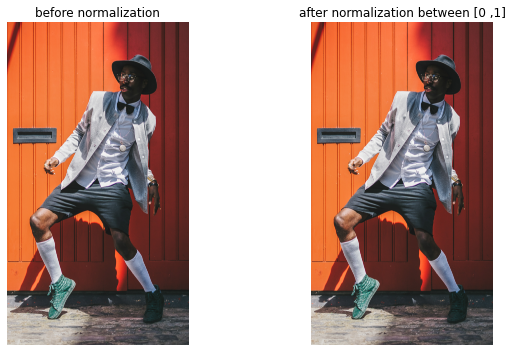

In [68]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy())#, cmap='gray')
plt.title("before normalization")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image1_tf)#, cmap='gray')
plt.title("after normalization between [0 ,1]")
plt.axis('off')

plt.tight_layout()
plt.show()


### Standardization

In [69]:
# This Linearly scales each image in `image` to have mean 0 and variance 1
standardized_imaged_tf = tf.image.per_image_standardization(image_tf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


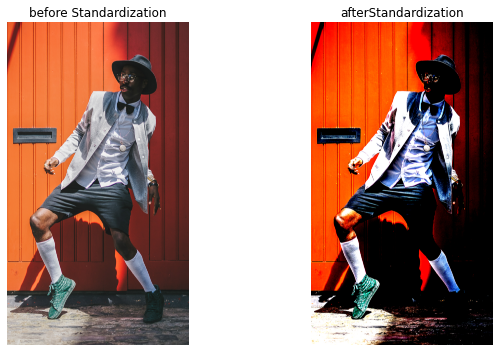

In [70]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_tf.numpy())#, cmap='gray')
plt.title("before Standardization")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(standardized_imaged_tf.numpy())#, cmap='gray')
plt.title("after Standardization")
plt.axis('off')

plt.tight_layout()
plt.show()


In [71]:
print(standardized_imaged_tf.numpy().mean(), standardized_imaged_tf.numpy().std())

1.7587023e-07 0.9999999


>#### <font color=#800080>Task 4:</font> <a class="anchor" id="Task-1"></a>


## Radiography-based Diagnostic System (Health)

In many African regions, there's a scarcity of advanced medical diagnostic equipment and specialists. Telemedicine has started bridging this gap, allowing remote diagnosis based on X-rays and other radiographs. To make this more effective, a system is proposed to preprocess these images for clearer visualization and standardization. They are stored in the `radio_images` folder.


1. Resizing: Due to varied machines and resolutions, resize any incoming radiograph to a standard size of 512x512 pixels.

2. Histogram Equalization: Improve the clarity of images by enhancing the contrast.

3. Rotation: Occasionally, images are taken at slight angles. Correct any such misalignment by rotating the image.

4. Flipping: Some images might be captured as mirror images, correct them by horizontal flipping.

5. Normalization and Standardization: Prepare the images for a machine learning model by normalizing and standardizing them.

>#### <font color=#800080>Task 5:</font> <a class="anchor" id="Task-1"></a>

## Road Quality Monitoring using Drone Images (Infrastructure)


Many African countries are investing heavily in road infrastructure. Using drones, images of roads are captured to monitor their condition. However, due to varied drone altitudes and angles, there's a need for preprocessing these images before analyzing road quality.  They are stored into the `drone_infra` folder.


1. Resizing: Standardize all images to a common resolution of 800x800 pixels.

2. Histogram Equalization: To bring out details in shadowed or overexposed sections.

3. Rotation: Drones might not always capture top-down. Correct angular discrepancies.

4. Flipping: Correct any images captured in the opposite direction.

5. Normalization and Standardization: Before feeding the images into a machine learning model, normalize and standardize them.